In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Random Forest').getOrCreate()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from ipynb.fs.full.Knn import *

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+------+
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|30.8|     1|
|27419|Female|59.0|           0|            0|         Yes|      Private|         Rural|            76.15|28.3|     1|
| 8213|  Male|78.0|           0|            1|         Yes|      Private|         Urban|           219.84|30.9|     1|
|25226|  Male|57.0|           0|            1|          No|     Govt_job|         Urban|           217.08|28.5|     1|
|61843|  Male|58.0|           0|            0|         Yes|      Private|         Rural|           189.84|30.2|     1|
|69160|  Male|59.0|           0|            0|  

In [2]:
# Replace 'other' with most frequent gender
df = df4.copy()
df['gender'].replace('Other', df4['gender'].value_counts().idxmax(), inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [3]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,30.8,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,28.3,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,30.9,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,28.5,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,30.2,1


In [4]:
# Select and transform the required columns
le = LabelEncoder()
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df[cat_cols] = df[cat_cols].apply(le.fit_transform)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi,stroke
0,1,67.0,0,1,1,2,1,228.69,0,30.8,1
1,0,61.0,0,0,1,3,0,202.21,1,28.3,1
2,1,80.0,0,1,1,2,0,105.92,1,30.9,1
3,0,49.0,0,0,1,2,1,171.23,2,28.5,1
4,0,79.0,1,0,1,3,0,174.12,1,30.2,1


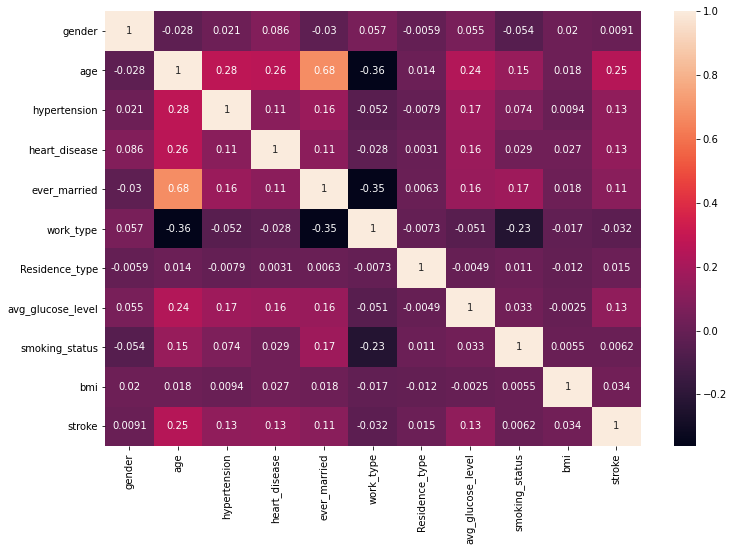

In [5]:
# Find the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [6]:
# Perform the split into training and testing datasets
X = df.drop('stroke', axis=1)
y = df['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Fit the model and predict with Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators = 50) 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print out the metrics for Random Forest Classifier
print("The F1-score of Random Forest Classifier is: {}".format(round(f1_score(y_test, y_pred_rf),2)))
arg_test = {'y_true':y_test, 'y_pred':y_pred_rf}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

The F1-score of Random Forest Classifier is: 0.07
[[1196    2]
 [  77    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.60      0.04      0.07        80

    accuracy                           0.94      1278
   macro avg       0.77      0.52      0.52      1278
weighted avg       0.92      0.94      0.91      1278



In [8]:
# Use RandomUnderSampler module
#to balance the class distribution for a classification dataset that has a skewed class distribution
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Check with Random Forest Classifier
rf_rus = RandomForestClassifier(random_state=42, n_estimators = 50)
rf_rus.fit(X_rus, y_rus)
y_pred_rf_rus = rf_rus.predict(X_test)

# Print out the metrics for Random Forest Classifier
print("The F1-score of Random Forest Classifier is: {}".format(round(f1_score(y_test, y_pred_rf_rus),2)))
arg_test = {'y_true':y_test, 'y_pred':y_pred_rf_rus}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

The F1-score of Random Forest Classifier is: 0.29
[[902 296]
 [ 16  64]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1198
           1       0.18      0.80      0.29        80

    accuracy                           0.76      1278
   macro avg       0.58      0.78      0.57      1278
weighted avg       0.93      0.76      0.82      1278



In [9]:
# Use RandomOverSampler module

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# Check with Random Forest Classifier
rf_ros = RandomForestClassifier(random_state=42, n_estimators = 50)
rf_ros.fit(X_ros, y_ros)
y_pred_rf_ros = rf_ros.predict(X_test)

# Print out the metrics for Random Forest Classifier

print("The F1-score of Random Forest Classifier is: {}".format(round(f1_score(y_test, y_pred_rf_ros),2)))
arg_test = {'y_true':y_test, 'y_pred':y_pred_rf_ros}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

The F1-score of Random Forest Classifier is: 0.19
[[1192    6]
 [  71    9]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1198
           1       0.60      0.11      0.19        80

    accuracy                           0.94      1278
   macro avg       0.77      0.55      0.58      1278
weighted avg       0.92      0.94      0.92      1278



In [10]:
#separate majority and minority classes
from sklearn.utils import resample

df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]

#Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=4861,random_state=123)

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Display new class counts
df_upsampled.stroke.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [11]:
# Perform the split into training and testing datasets
X = df_upsampled.drop('stroke', axis=1)
y = df_upsampled['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
# Evaluation

# Fit the model and predict with Random Forest Classifier
rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print out the metrics for Random Forest Classifier
print("The F1-score of Random Forest Classifier is: {}".format(round(f1_score(y_test, y_pred_rf),2)))
arg_test = {'y_true':y_test, 'y_pred':y_pred_rf}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

The F1-score of Random Forest Classifier is: 0.99
[[1218   23]
 [   0 1190]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1241
           1       0.98      1.00      0.99      1190

    accuracy                           0.99      2431
   macro avg       0.99      0.99      0.99      2431
weighted avg       0.99      0.99      0.99      2431

